# Heart Attack Analysis and Prediction

Problems:

1. In the United States, someone has a heart attack every 40 seconds
2. Every year, about 805,000 people in the United States have a heart attack and about 1 in 5 heart attacks are silent—the damage is done, but the person is not aware of it
(CDC, 2023)


Objective:

To find out the causes/factors of heart attack and to develop a predicting model of the likelihood of heart attack in patients based on their medical history, so the company/hospital can aid in customer profiling and treatment plans, and the patients/everyone can take preventive measures by acknowledging their potential risk

# Install Libraries

In [1]:
!pip install xgboost
!pip install lightgbm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Preliminary Look and Data Cleaning

## Sample of Data

In [4]:
# showing top 5 rows of the data
pd.set_option('display.max_columns', None)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# sample 5 rows of the data
df.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2,1
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


Observations:

1. xxxxxxxxxxxxxxxxxxx
2. xxxxxxxxxxxxxxxxxxx
3. xxxxxxxxxxxxxxxxxxx

## General Information and Missing Values

`age` - Age of the patient

`sex` - Sex of the patient

`cp` - Chest pain type (0: Typical Angina, 1: Atypical Angina, 2: Non-anginal Pain, 3: Asymptomatic)

`trtbps` - Resting blood pressure (in mm Hg)

`chol` - Cholestoral in mg/dl fetched via BMI sensor

`fbs` - fasting blood sugar > 120 mg/dl

`restecg` - Resting electrocardiographic results (0: Normal, 1: ST-T wave normality, 2: Left ventricular hypertrophy)

`thalachh` - Maximum heart rate achieved

`exng` - Exercise induced angina

`oldpeak` - Previous peak

`slp` - the slope of the peak exercise ST segment (0: downsloping; 1: flat; 2: upsloping)

`caa` - Number of major vessels

`thall` - Thalium Stress Test result (1: fixed defect (no blood flow in some part of the heart); 2: normal blood flow; 3: reversible defect (a blood flow is observed but it is not normal))

`output` - Target variable

In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Observation:

1. Data contains 13 columns with 303 rows
2. There are missing values

## Duplicated Data Handling

In [8]:
# number of duplicated data
df.duplicated().sum()

1

In [9]:
# drop duplicate
df.drop_duplicates(inplace=True)

## Change Column Name for Better Readability

In [10]:
df.rename(columns={'trtbps':'restbps', 
                   'thalachh':'maxheartrate', 
                   'slp':'slope', 
                   'caa':'ca', 
                   'thall':'thal', 
                   'output':'heartatk'}, inplace=True)

## Change `cp` Encoding for Better Readability

In [11]:
df['cp'] = df['cp'].replace([0, 1, 2, 3], [3, 2, 1, 0])
df

,age,sex,cp,restbps,chol,fbs,restecg,maxheartrate,exng,oldpeak,slope,ca,thal,heartatk
0,63,1,0,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,1,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,2,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,2,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,3,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,3,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,0,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,3,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,3,130,131,0,1,115,1,1.2,1,1,3,0


0: Asymptomatic
1: Non-anginal Pain
2: Atypical Angina
3: Typical Angina

## Delete `thal` = 0 (null)

In [12]:
df[df['thal'] == 0]

,age,sex,cp,restbps,chol,fbs,restecg,maxheartrate,exng,oldpeak,slope,ca,thal,heartatk
48,53,0,1,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,3,128,204,1,1,156,1,1.0,1,0,0,0


In [13]:
df = df[df['thal'] != 0]

## Statistical Summary

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,300.0,54.433333,9.076720,29.0,47.75,56.0,61.0,77.0
sex,300.0,0.683333,0.465953,0.0,0.00,1.0,1.0,1.0
cp,300.0,2.036667,1.032250,0.0,1.00,2.0,3.0,3.0
restbps,300.0,131.626667,17.619557,94.0,120.00,130.0,140.0,200.0
chol,300.0,246.743333,51.837514,126.0,211.00,241.5,275.0,564.0
fbs,300.0,0.146667,0.354364,0.0,0.00,0.0,0.0,1.0
restecg,300.0,0.526667,0.526192,0.0,0.00,1.0,1.0,2.0
maxheartrate,300.0,149.663333,22.889658,71.0,133.75,152.5,166.0,202.0
exng,300.0,0.326667,0.469778,0.0,0.00,0.0,1.0,1.0
oldpeak,300.0,1.046667,1.163760,0.0,0.00,0.8,1.6,6.2


Observation:

1. Overall, the minimum and maximum values make sense for each column
2. Mean ~ Median in restbps, chol, and maxheartrate indicating quite a symmetrical distribution

# Exploratory Data Analysis

## heartatk as Target Variable

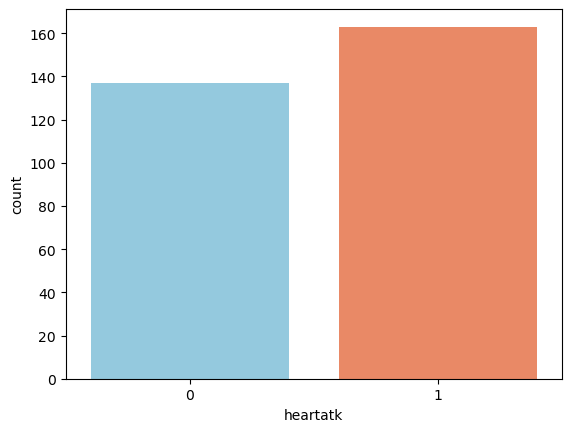

In [15]:
# countplot
pal = {1:'coral', 0:'skyblue'}

sns.countplot(df['heartatk'], palette = pal)

plt.show()

## Univariate Analysis

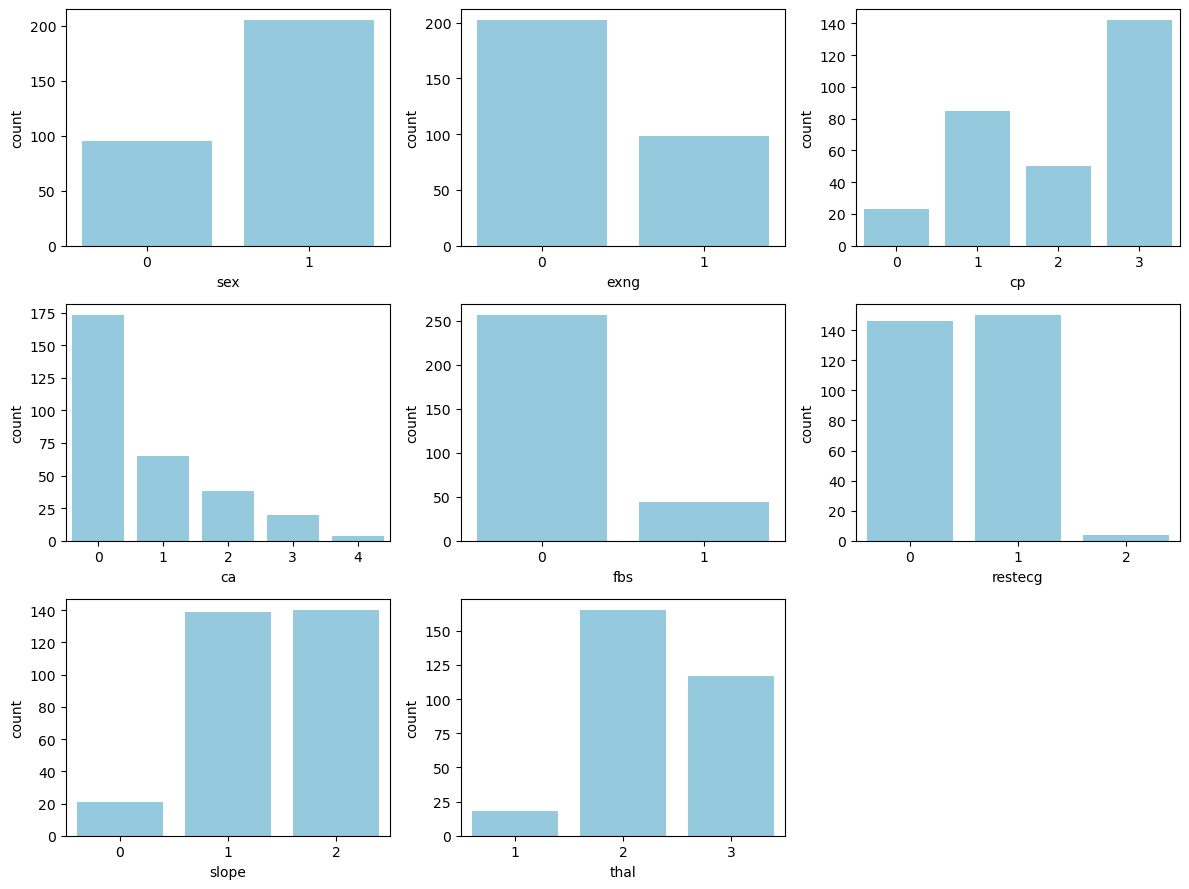

In [16]:
plt.figure(figsize=(12,9))

features = ['sex', 'exng', 'cp', 'ca', 'fbs', 'restecg', 'slope', 'thal']
for i in np.arange(0, len(features)):
    plt.subplot(3, len(features)//3+1, i+1)
    sns.countplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observations:
1. sex with value 1 (male) is significantly higher than value 0 (female)
2. exng with value 0 (no exercise induced angina) is significantly higher than value 1
2. People who have chest pain of type 3 i.e 'Typical Angina' is the highest
3. FBS with value 0 is significantly higher than value 1

## Multivariate Analysis

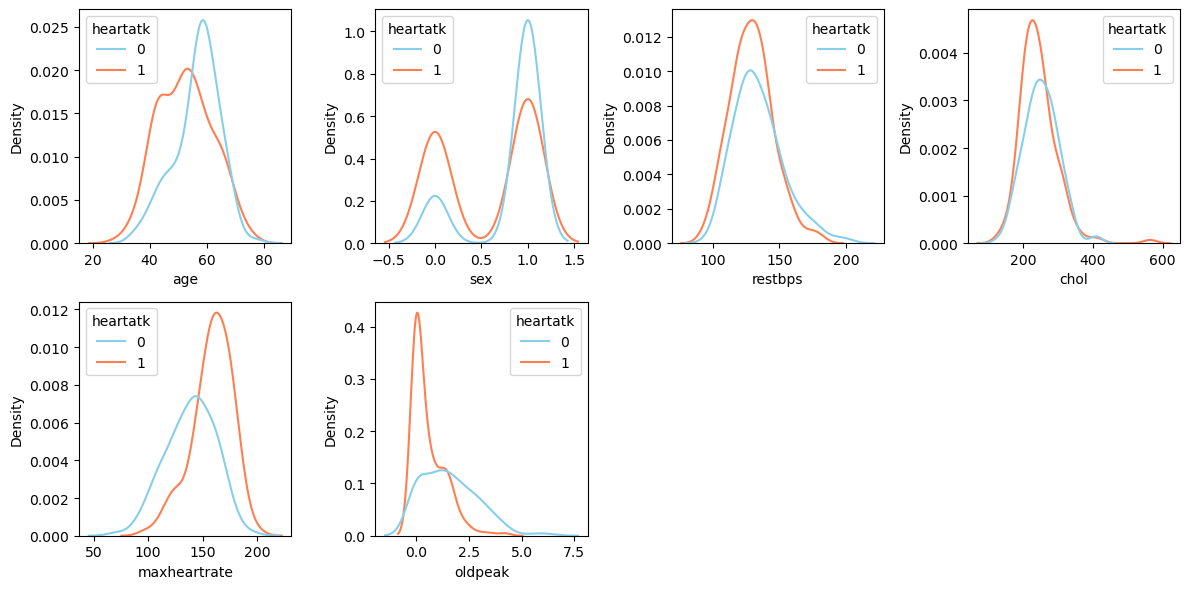

In [17]:
# kde plot
plt.figure(figsize=(12,6))

features = ['age', 'sex', 'restbps', 'chol', 'maxheartrate', 'oldpeak']
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2+1, i+1)
    sns.kdeplot(x=df[features[i]], hue=df['heartatk'], palette=pal)
    plt.xlabel(features[i])
    plt.tight_layout()

Observations:
1. In this dataset, it is not proven that as age increase, the higher risk of heart attack
2. Female has higher risk of heart attack
3. There is no obvious relationship between restbps and chol with heart attack
4. People with higher maximum heart rate have higher risk of heart attack
5. People with lower previous peak have higher risk of heart attack

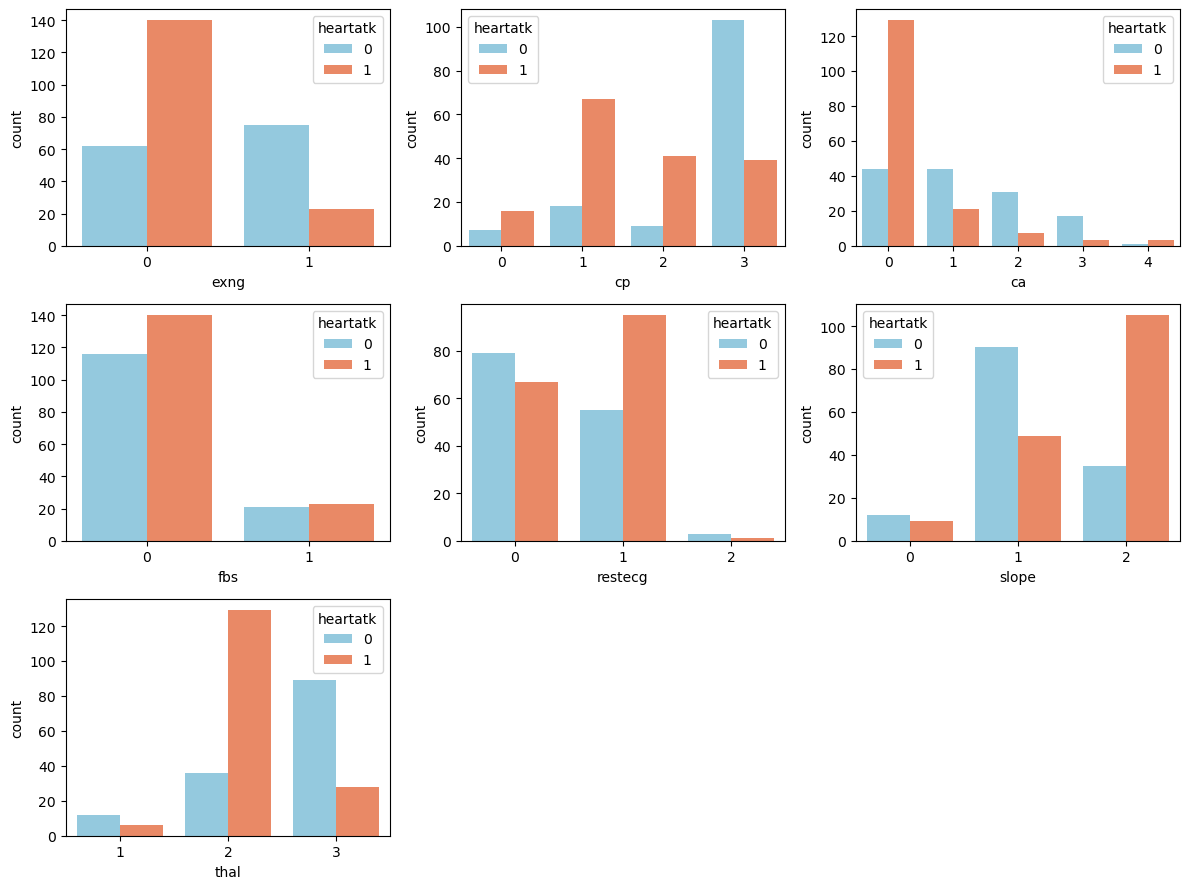

In [18]:
# bar plot for categorical features
plt.figure(figsize=(12,9))

features = ['exng', 'cp', 'ca', 'fbs', 'restecg', 'slope', 'thal']
for i in np.arange(0, len(features)):
    plt.subplot(3, len(features)//3+1, i+1)
    sns.countplot(x=df[features[i]], hue=df['heartatk'], palette=pal)
    plt.xlabel(features[i])
    plt.tight_layout()

Observations:

1. People with no exercise induced angina have higher chance of heart attack
2. Most of the heart attack patients are found to have non-anginal chest pain
3. People with 0 major vessels (?) have high chance of heart attack
4. Most of the heart attack patients are found to normal blood flow

<AxesSubplot:>

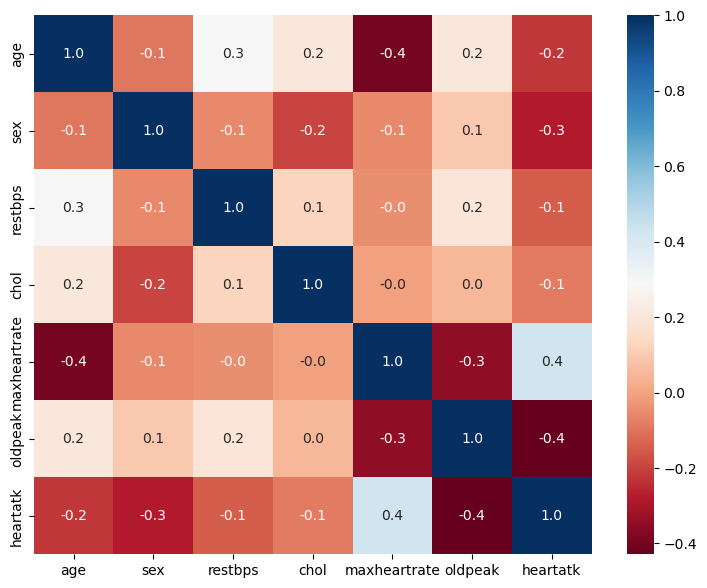

In [19]:
corr_= df[['age', 'sex', 'restbps', 'chol', 'maxheartrate', 'oldpeak', 'heartatk']].corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr_, annot=True, fmt = '.1f', cmap = "RdBu")

Observation:

There are no significant correlations among the numerical predictors in the dataset

## Deep Dive Analysis

### What is the profile of max heart rate between female and male patients with heart attack?

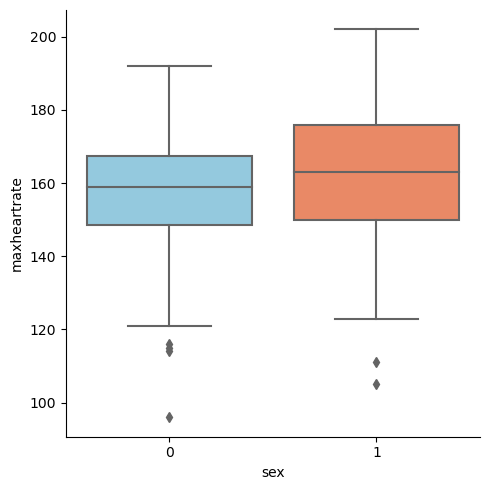

In [49]:
# catplot
hatk = df[df['heartatk']==1]

sns.catplot(data=hatk, x='sex', y='maxheartrate', kind='box', palette=pal)
plt.show()

Female tends to have a heart attack with a lower maximum heart rate than male

### What is the profile of age between female and male patients with heart attack?

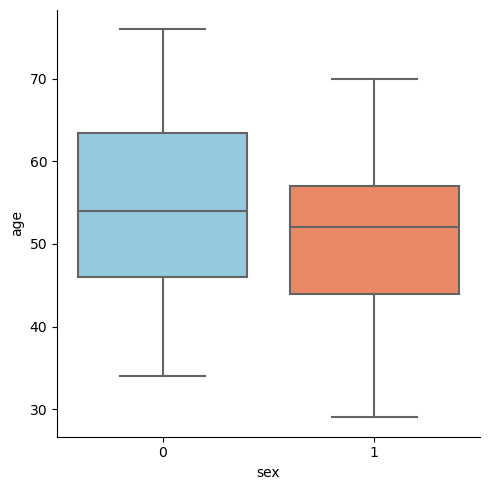

In [50]:
# catplot
hatk = df[df['heartatk']==1]

sns.catplot(data=hatk, x='sex', y='age', kind='box', palette=pal)
plt.show()

The male tends to have a heart attack at a younger age than female

# Modelling

In [20]:
X = df.drop(['heartatk'],axis=1)
y = df['heartatk']

In [21]:
# Set up model
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [23]:
ml = [('LightGBM',lgbm),
      ('XGBoost',xgb)]


df_metric = pd.DataFrame(columns = ['model','recall train','recall test'])

for model in ml:
    model[1].fit(X_train, y_train)
    y_pred_train = model[1].predict(X_train)
    y_pred_test = model[1].predict(X_test)
    models = model[0]
    
    #recall
    rec_train = recall_score(y_train, y_pred_train)
    rec_test = recall_score(y_test, y_pred_test)
    
    df_metric = df_metric.append({'model':models,'recall train':rec_train,'recall test':rec_test}, ignore_index=True)

In [24]:
df_metric

,model,recall train,recall test
0,LightGBM,1.0,0.785714
1,XGBoost,1.0,0.821429


In this dataset, XGBoost model has better result than LightGBM

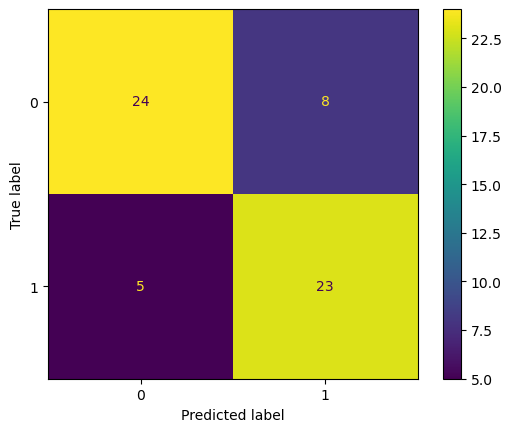

recall score XGBoost:  0.8214285714285714


In [52]:
# plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix

xgb = XGBClassifier(random_state=42) 
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

plot_confusion_matrix(xgb, X_test, y_test,)
plt.show()
print('recall score XGBoost: ',recall_score(y_test, y_pred))

We want to minimize false negatives, so we use recall score as an evaluation metric. XGBoost has already gotten a quite good performance, with a recall score of 82.14%

# Tuning Parameter XGBoost

## Tune Learning Rate

We will try to tune the learning rate to get the optimum learning speed without missing the optimum solution

In [26]:
learning_rate_list = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

learning_rate = []
rec_score = []

for eta in learning_rate_list:
    xgb = XGBClassifier(learning_rate=eta,random_state=42).fit(X_train,y_train)
    recall = recall_score(y_test,xgb.predict(X_test))*100
    rec_score.append(recall)
    learning_rate.append(eta)
    
#create dataset eta
df_eta = pd.DataFrame({'learning_rate':learning_rate,
                       'recall_score':rec_score})

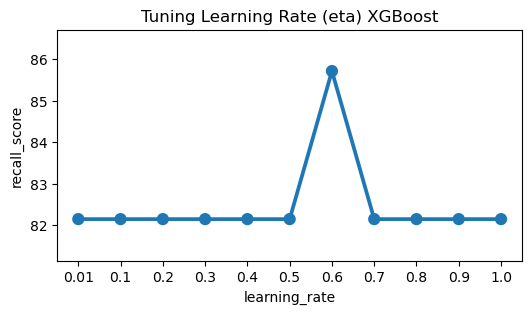

In [27]:
plt.figure(figsize=(6,3))
sns.pointplot(data=df_eta,x='learning_rate',y='recall_score')
plt.title('Tuning Learning Rate (eta) XGBoost')
plt.ylim(min(df_eta['recall_score'])-1,max(df_eta['recall_score'])+1)
plt.show()

eta = 0.6

## Tune Max Depth

To get the optimum max depth for learning so the model can learn the complex pattern of the data

In [28]:
max_depth = []
rec_score = []

for depth in range(1,15):
    xgb = XGBClassifier(max_depth=depth,random_state=42).fit(X_train,y_train)
    recall = recall_score(y_test,xgb.predict(X_test))*100
    rec_score.append(recall)
    max_depth.append(depth)


#create dataset max depth
df_max_depth = pd.DataFrame({'max_depth':max_depth,
                             'recall_score':rec_score})

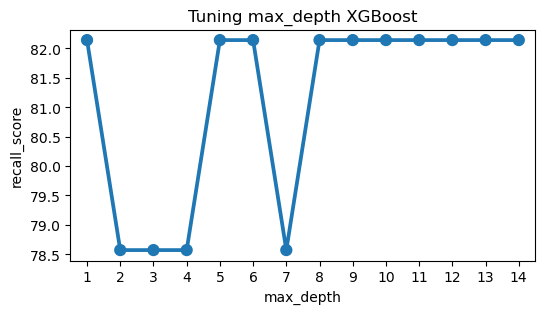

In [29]:
plt.figure(figsize=(6,3))
sns.pointplot(data=df_max_depth,x='max_depth',y='recall_score')
plt.title('Tuning max_depth XGBoost')
#plt.ylim(min(df_max_depth['recall_score'])-0.03,max(df_max_depth['recall_score'])+0.01)
plt.show()

max_depth = 5

## Tune subsample

To reduce the variability of the data as well as overfitting

In [32]:
subsample = []
rec_score = []

for sub in [0.0001,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9, 1]:
    xgb = XGBClassifier(subsample=sub,random_state=42).fit(X_train,y_train)
    recall = recall_score(y_test,xgb.predict(X_test))*100
    rec_score.append(recall)
    subsample.append(sub)


#create dataset eta
df_subsample = pd.DataFrame({'subsample':subsample,
                             'recall_score':rec_score})

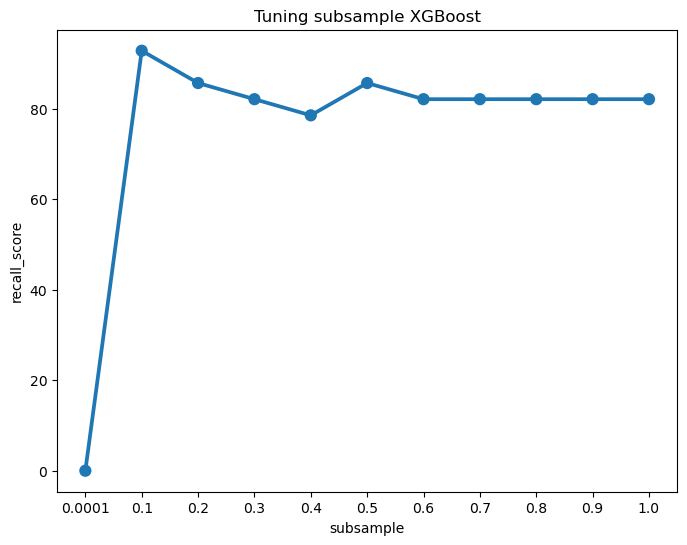

In [33]:
plt.figure(figsize=(8,6))
sns.pointplot(data=df_subsample,x='subsample',y='recall_score')
plt.title('Tuning subsample XGBoost')
plt.show()

subsample = 0.6

## Tune reg_lambda

To reduce overfitting

In [34]:
reg_lambda = []
rec_score = []

for lambda_ in [0.0001,0.001, 0.01, 0.1, 0.5, 1, 1.5,1.6,1.7,1.8,1.9,2]:
    xgb = XGBClassifier(reg_lambda=lambda_,random_state=42).fit(X_train,y_train)
    recall = recall_score(y_test,xgb.predict(X_test))*100
    rec_score.append(recall)
    reg_lambda.append(lambda_)


#create dataset reg_lambda
df_reg_lambda = pd.DataFrame({'reg_lambda':reg_lambda,
                              'recall_score':rec_score})

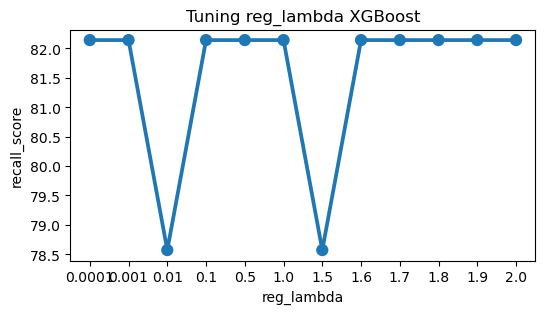

In [35]:
plt.figure(figsize=(6,3))
sns.pointplot(data=df_reg_lambda,x='reg_lambda',y='recall_score')
plt.title('Tuning reg_lambda XGBoost')
plt.show()

reg_lambda = 0.5

## Put all together

In [46]:
before = XGBClassifier(random_state=42)
after = XGBClassifier(eta=0.6, max_depth=5, subsample=0.6, reg_lambda=1.6, random_state=42)

hptune = [('Before Tuning',before),
          ('After Tuning',after)]

df_metric = pd.DataFrame(columns = ['model','recall score'])

for model in hptune:
    model[1].fit(X_train, y_train)
    y_pred = model[1].predict(X_test)
    models = model[0]
    
    recall = recall_score(y_test, y_pred)
    
    df_metric = df_metric.append({'model':models,'recall score':recall}, ignore_index=True)
    
df_metric

,model,recall score
0,Before Tuning,0.821429
1,After Tuning,0.857143


After tuning, the recall score is increasing by 3.6%

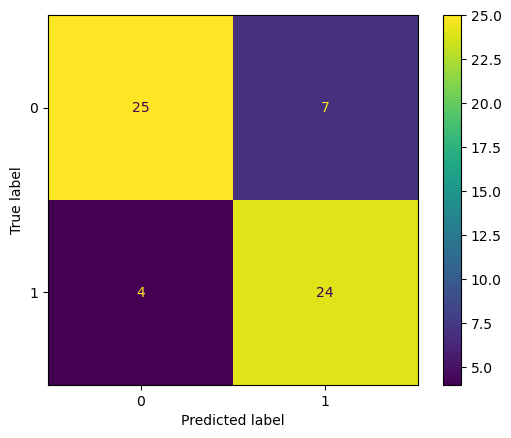

recall score:  0.8571428571428571


In [53]:
# plotting confusion matrix

xgb = XGBClassifier(eta=0.6, max_depth=5, subsample=0.6, reg_lambda=1.6, random_state=42) 
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

plot_confusion_matrix(xgb, X_test, y_test,)
plt.show()
print('recall score: ',recall_score(y_test, y_pred))